HANDLING IMBALANCED DATASET

In [3]:
import numpy as np
import pandas as pd

In [4]:
#set the random seed for reproductibility 

np.random.seed(123)

#create a dataframe with two classes 

n_sample=1000
class_0_ratio=0.9
n_class_0= int(n_sample*class_0_ratio)
n_class_1= n_sample-n_class_0

In [5]:
n_class_0,n_class_1

(900, 100)

In [6]:
class_0=pd.DataFrame({
       "feature_1":np.random.normal(loc=0,scale=1,size=n_class_0),
       "feature_2":np.random.normal(loc=0,scale=1,size=n_class_0),
       "target":[0]*n_class_0
})

class_1=pd.DataFrame({
     "feature_1":np.random.normal(loc=2,scale=2,size=n_class_1),
     "feature_2":np.random.normal(loc=2,scale=2,size=n_class_1),
     "target":[1]*n_class_1
})

In [7]:
class_1

,feature_1,feature_2,target
0,1.399535,2.278067,1
1,0.735478,2.051153,1
2,1.591367,1.607114,1
3,2.427391,4.624510,1
4,4.067756,4.374835,1
...,...,...,...
95,0.752742,3.691402,1
96,2.479619,-0.239845,1
97,0.263521,1.281407,1
98,3.804013,-1.219390,1


In [8]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [9]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [10]:
df.tail()

,feature_1,feature_2,target
995,0.752742,3.691402,1
996,2.479619,-0.239845,1
997,0.263521,1.281407,1
998,3.804013,-1.219390,1
999,3.394980,2.027140,1


In [11]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

/tmp/ipykernel_2553/3584177352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<AxesSubplot: ylabel='Density'>

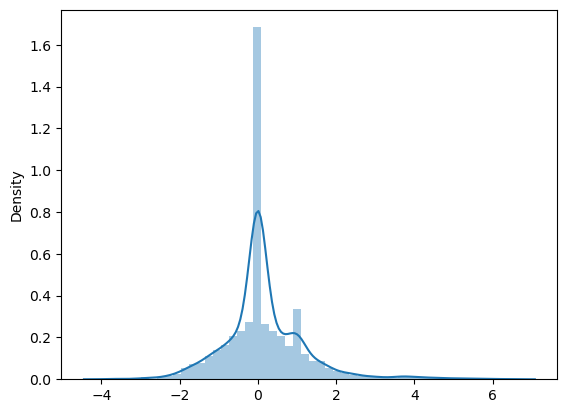

In [12]:
import seaborn as sns 

sns.distplot(df)

up sampling

In [14]:
df_minortiy=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [15]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [16]:
df_minortiy.head()

,feature_1,feature_2,target
900,1.399535,2.278067,1
901,0.735478,2.051153,1
902,1.591367,1.607114,1
903,2.427391,4.624510,1
904,4.067756,4.374835,1


In [17]:
##upsampling perform now 

from sklearn.utils import resample

In [28]:
df_minortiy_upsample=resample(df_minortiy,
                              replace=True, #sample with replacement
                              n_samples=len(df_majority), ##to match the majority class
                              random_state=42
                             )


In [29]:
df_minortiy_upsample.shape

(900, 3)

In [30]:
df_minortiy_upsample["target"].value_counts()

1    900
Name: target, dtype: int64

In [32]:
df_upsampled= pd.concat([df_majority,df_minortiy_upsample])

In [35]:
df_upsampled["target"].value_counts()

0    900
1    900
Name: target, dtype: int64

In [37]:
df_upsampled.shape

(1800, 3)

down sampling 

In [39]:
class_0=pd.DataFrame({
       "feature_1":np.random.normal(loc=0,scale=1,size=n_class_0),
       "feature_2":np.random.normal(loc=0,scale=1,size=n_class_0),
       "target":[0]*n_class_0
})

class_1=pd.DataFrame({
     "feature_1":np.random.normal(loc=2,scale=2,size=n_class_1),
     "feature_2":np.random.normal(loc=2,scale=2,size=n_class_1),
     "target":[1]*n_class_1
})

In [40]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
df_minortiy=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [46]:
df_majority_downsample=resample(df_majority,
                              replace=False, #sample without replacement
                              n_samples=len(df_minortiy), ##to match the majority class
                              random_state=42
                             )


In [48]:
df_majority_downsample.shape

(100, 3)

In [51]:
df_downsample=pd.concat([df_majority_downsample,df_minortiy])

In [52]:
df_downsample["target"].value_counts()

0    100
1    100
Name: target, dtype: int64